# Notebook: Day 5 - K-Nearest Neighbors (Music Classification)

### Project: The Spotify Genre Classifier
**Goal:** We want to build a system that automatically determines the genre of a song.
**The Tool:** K-Nearest Neighbors (KNN).
**The Concept:** The algorithm operates on the principle of "peer pressure." It assumes that if a song is similar in speed and loudness to Heavy Metal songs, it is likely a Heavy Metal song itself.

Unlike other algorithms that learn a mathematical formula, KNN simply memorizes the data map and measures distance to make decisions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('spotify_genre_data.csv')

# Display the first few rows
df.head()

,Tempo_BPM,Energy_Score,Genre
0,144.0,95.0,Heavy Metal
1,126.0,54.0,Pop
2,157.0,88.0,Heavy Metal
3,127.0,58.0,Pop
4,109.0,60.0,Pop


### Step 1: Visualizing the "Neighborhoods"
Before we run any code, we must understand the geography of our data.

We will create a scatter plot with **Tempo** on the X-axis and **Energy** on the Y-axis. We will color the dots by **Genre**.

This visualization is critical because KNN is a geometric algorithm. It looks at where points are located in space. You should see three distinct groups (clusters) forming on the chart.

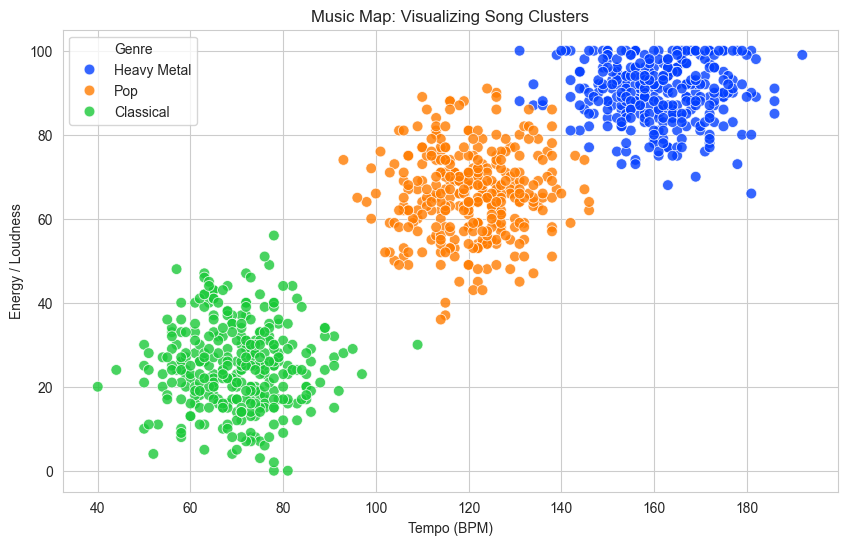

In [4]:
plt.figure(figsize=(10, 6))

# Plot the songs
sns.scatterplot(x='Tempo_BPM', y='Energy_Score', data=df, hue='Genre', palette='bright', s=60, alpha=0.8)

plt.title('Music Map: Visualizing Song Clusters')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energy / Loudness')
plt.legend(title='Genre')
plt.show()

### Step 2: Preparing the Data
The model needs two things:
1. **Features (X):** The data it uses to measure distance (Tempo and Energy).
2. **Target (y):** The answer key (Genre).

We also split the data into training and testing sets. We use 80% of the songs to build the map (Training) and keep 20% secret to test the accuracy later.

In [5]:
# 1. Define Features and Target
X = df[['Tempo_BPM', 'Energy_Score']]
y = df['Genre']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split.")
print(f"Training on {X_train.shape[0]} songs.")
print(f"Testing on {X_test.shape[0]} songs.")

Data successfully split.
Training on 799 songs.
Testing on 200 songs.


### Step 3: The "Lazy" Training
We now initialize the K-Nearest Neighbors algorithm.

We set `n_neighbors=5`. This is the **"K"** in KNN. It means: "When you see a new song, look at the **5 closest songs** around it to decide what it is."

Note that when we run `.fit()`, the model does not calculate a formula like Linear Regression. Instead, it effectively saves the entire training dataset into memory. It memorizes the map.

In [6]:
# Initialize the model looking at the 5 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model (Memorize the training data)
knn.fit(X_train, y_train)

print("Model has memorized the training data.")

Model has memorized the training data.


### Step 4: Classifying a Mystery Song
Let's see the algorithm in action. We will create a new, hypothetical song that the model has never seen before.

**The Mystery Song:**
* **Tempo:** 170 BPM (Very Fast)
* **Energy:** 90 (Very Loud)

Based on the visualization we made earlier, we expect this to be **Heavy Metal**. Let's ask the model to look at the neighbors and predict the genre.

In [7]:
# Define the new song
new_song = pd.DataFrame({'Tempo_BPM': [170], 'Energy_Score': [90]})

# Predict the genre
prediction = knn.predict(new_song)
probabilities = knn.predict_proba(new_song)

print("--- Prediction Results ---")
print(f"Input: 170 BPM, 90 Energy")
print(f"Predicted Genre: {prediction[0]}")

# Show the voting confidence
print("\nVoting Confidence:")
# We map the classes to their probabilities
for genre, score in zip(knn.classes_, probabilities[0]):
    print(f"{genre}: {score*100:.0f}% of neighbors")

--- Prediction Results ---
Input: 170 BPM, 90 Energy
Predicted Genre: Heavy Metal

Voting Confidence:
Classical: 0% of neighbors
Heavy Metal: 100% of neighbors
Pop: 0% of neighbors


### Step 5: Evaluation
Finally, we test the model on the 200 songs we hid in the test set.

Because the genres in this dataset are visually distinct, we expect a very high accuracy score. In real-world data, the boundaries are often blurrier, which makes choosing the right "K" value more important.

In [8]:
# Calculate accuracy on the test set
accuracy = knn.score(X_test, y_test)

print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 98.50%


### Conclusion
We successfully built a classifier that can distinguish between Classical, Pop, and Heavy Metal music purely based on speed and loudness.

**Key Takeaway:**
KNN is powerful because it is simple. It does not assume a mathematical relationship; it relies on the assumption that similar data points exist near each other. If you are near a cluster of Pop songs, you are likely a Pop song.